In [6]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import torch
import cv2
from thebook.cv2 import load, norm
from thebook.fuse.Fuse import ModalityTransform, TransformMode
from thebook.jupyter import funcs as jfunc
from noaadb import Session
from noaadb.api.queries import *
from noaadb.schema.models import EOImage, HeaderMeta, IRLabelEntry, Species, IRImage, Flight, Camera, Survey, Homography
import matplotlib.pyplot as plt
project_path = '/home/yuval/Documents/XNOR/sealnet-mlflow/experiments/fusion_methods/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
s = Session()
with_sightings = get_ir_with_sightings(s, survey='test_kotz_2019', cam='C', flight='fl05')
ir_obj = with_sightings[26]
eo_obj = s.query(EOImage).filter(EOImage.file_name.contains(ir_obj.guid)).first()

im_eo = cv2.imread(eo_obj.file_path)
im_ir = load.read_ir_norm(ir_obj.file_path)

homography = s.query(Homography).filter(Homography.camera_id == eo_obj.header_meta.camera_id).first()
H = homography.matrix

t = ModalityTransform(H, TransformMode.IRTOEO)

ir_to_eo = t.transform(im_ir, (eo_obj.width, eo_obj.height))

s.close()


337.2307692307692


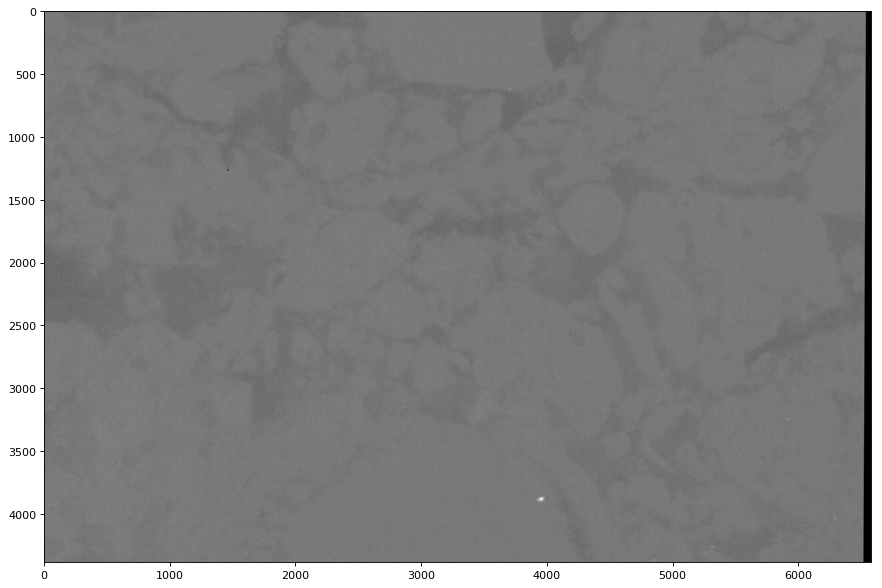

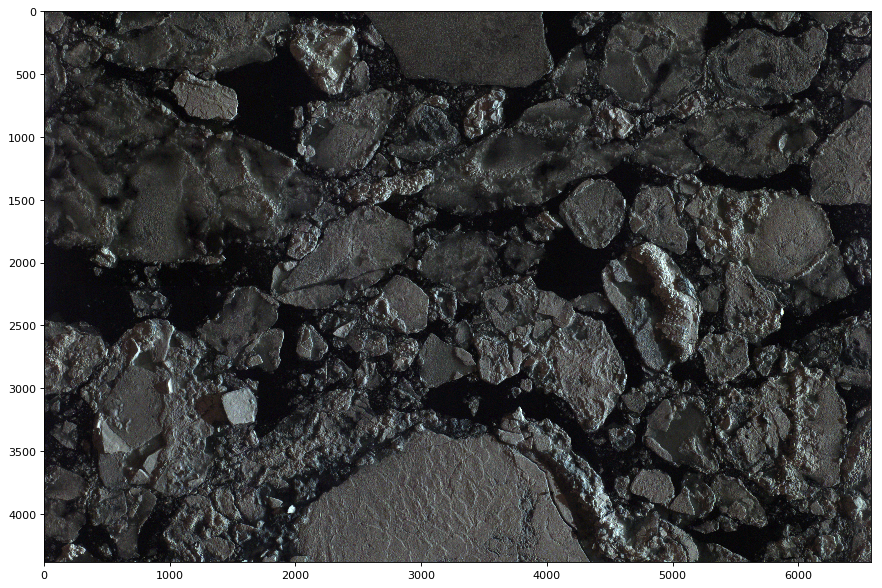

In [24]:
%matplotlib inline
print(ir_to_eo.shape[0]/13)
jfunc.plot_8_bit_ir(ir_to_eo, 20)
jfunc.plot_8_bit_eo(im_eo, 20)